In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
def load_iris_dataset():
    from sklearn.datasets import load_iris
    iris = load_iris()
    X = iris.data  
    y = iris.target 
    feature_names = iris.feature_names
    target_names = iris.target_names
    print("Features:", feature_names)
    print("Target names:", target_names)
    print("Data sample:")
    for i in range(5):
        print("Features:", X[i], "-> Target:", target_names[y[i]])
    return X, y, feature_names, target_names
X, y, feature_names, target_names = load_iris_dataset()
print("Features:", feature_names)
print("Target names:", target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data sample:
Features: [5.1 3.5 1.4 0.2] -> Target: setosa
Features: [4.9 3.  1.4 0.2] -> Target: setosa
Features: [4.7 3.2 1.3 0.2] -> Target: setosa
Features: [4.6 3.1 1.5 0.2] -> Target: setosa
Features: [5.  3.6 1.4 0.2] -> Target: setosa
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
def split_dataset(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [7]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, x_test, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train[i]))
    distances = sorted(distances)[:k]
    labels = [dist[1] for dist in distances]
    return max(set(labels), key=labels.count)

In [8]:
def KNN(X_train, y_train, X_test, k=3):
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i], k))
    return np.array(predictions)

In [9]:
def evaluate(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    return acc, cm

In [10]:
def plot_k_vs_accuracy(X, y, X_test, y_test, max_k=20):
    accuracies = []
    k_values = range(1, max_k+1)
    for k in k_values:
        y_pred = KNN(X, y, X_test, k)
        acc, _ = evaluate(y_test, y_pred)
        accuracies.append(acc)
    plt.plot(k_values, accuracies)
    plt.title('k vs Accuracy')
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy')
    plt.show()

In [20]:
def main():
    X, y = load_iris_dataset()
    X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=0.2, random_state=42)
    k = 3  
    y_pred = KNN(X_train, y_train, X_test, k)
    acc, cm = evaluate(y_test, y_pred)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    plot_k_vs_accuracy(X_train, y_train, X_test, y_test)

In [21]:
def main():
    X, y, _, _ = load_iris_dataset()  
    X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=0.2, random_state=42)
    k = 3  
    y_pred = KNN(X_train, y_train, X_test, k)
    acc, cm = evaluate(y_test, y_pred)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    plot_k_vs_accuracy(X_train, y_train, X_test, y_test)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data sample:
Features: [5.1 3.5 1.4 0.2] -> Target: setosa
Features: [4.9 3.  1.4 0.2] -> Target: setosa
Features: [4.7 3.2 1.3 0.2] -> Target: setosa
Features: [4.6 3.1 1.5 0.2] -> Target: setosa
Features: [5.  3.6 1.4 0.2] -> Target: setosa
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


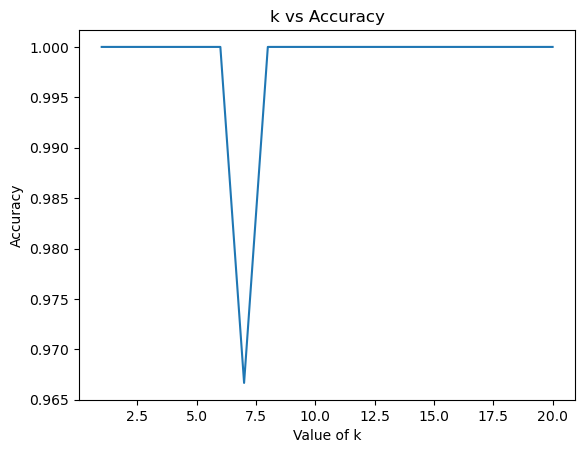

In [22]:
if __name__ == "__main__":
    main()